In [1]:

%load_ext autoreload
%autoreload 2


from shared.reaction_class import returnReactionTemplates, VirtualFlask


mechs = returnReactionTemplates()

4.23594069480896 1009
['CS(=O)Cc1ccc(N)cc1.O=C1OC(=O)c2ccccc21.O=P(Cl)(Cl)Cl', 'CS(=O)Cc1ccc([NH2+]C2([O-])OC(=O)c3ccccc32)cc1.O=P(Cl)(Cl)Cl', 'CS(=O)Cc1ccc(NC2([O-])OC(=O)c3ccccc32)cc1.O=P(Cl)(Cl)Cl', 'CS(=O)Cc1ccc(NC(=O)c2ccccc2C(=O)[O-])cc1.O=P(Cl)(Cl)Cl', 'CS(=O)Cc1ccc(NC(=O)c2ccccc2C(=O)O)cc1.O=P(Cl)(Cl)Cl', 'C[S+]([O-])Cc1ccc(NC(=O)c2ccccc2C(=O)O)cc1.O=P(Cl)(Cl)Cl', 'CS(Cl)(Cc1ccc(NC(=O)c2ccccc2C(=O)O)cc1)OP(=O)(Cl)Cl', 'C[S+](Cl)Cc1ccc(NC(=O)c2ccccc2C(=O)O)cc1.O=P([O-])(Cl)Cl', 'C[S+](Cl)Cc1ccc(NC([O-])(OP(=O)(Cl)Cl)c2ccccc2C(=O)O)cc1', 'C[S+](Cl)Cc1ccc([NH-])cc1.O=C(O)c1ccccc1C(=O)OP(=O)(Cl)Cl']
10
1009 1009 1009 1009


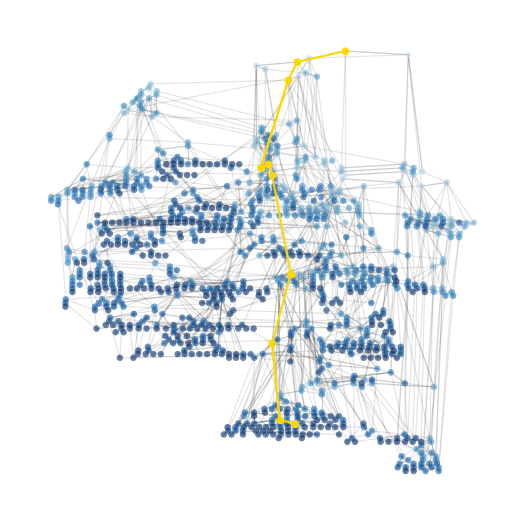

In [54]:
state_network = VirtualFlask(mechs)

intro_input = "O=S(CC1=CC=C(N)C=C1)C.O=P(Cl)(Cl)Cl.O=C(O1)C2=CC=CC=C2C1=O".split(".")
state_network.charge(intro_input, "")
state_network.run_until_done(iters=10, thresh=5000, ring_filter=False, precalc_prods=["O=C(C(NC1=CC=CC=C1)(P(OC)(OC)=O)C2=CC=CC=C2)O"])
hit_node = state_network.find_node_with_smiles("O=C(O)c1ccccc1C(=O)OP(=O)(Cl)Cl")
path = state_network.get_path_from_init_to_node(hit_node)
print(path)
state_network.draw_hypergraph_sub_no_filter(highlight=path)

In [60]:
from shared.filters3 import apply_filters_local

apply_filters_local(state_network)

tcp 507
ions 10
non participating atoms 2
structural failures 2


In [63]:
for k in state_network.nodes:
    # it's none after the first failure (F T T T)

    print(state_network.nodes[k].tcp, state_network.nodes[k].failed_thermo_state1, 
          state_network.nodes[k].contains_non_participating_transformation,
          state_network.nodes[k].structural_failure)
    break


for k in state_network.nodes:
    # it's none after the first failure (F T T T)

      if state_network.nodes[k].structural_failure == False:
           print(k)
           print(state_network.nodes[k].propagations)

False None None None
C[S+](Cl)Cc1ccc([NH-])cc1.O=C(O)c1ccccc1C(=O)OP(=O)(Cl)Cl
9
C[S+](Cl)Cc1ccc(N)cc1.O=C(O)c1ccccc1C(=O)OP(=O)(Cl)Cl
10


DiGraph with 1009 nodes and 2645 edges
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
N

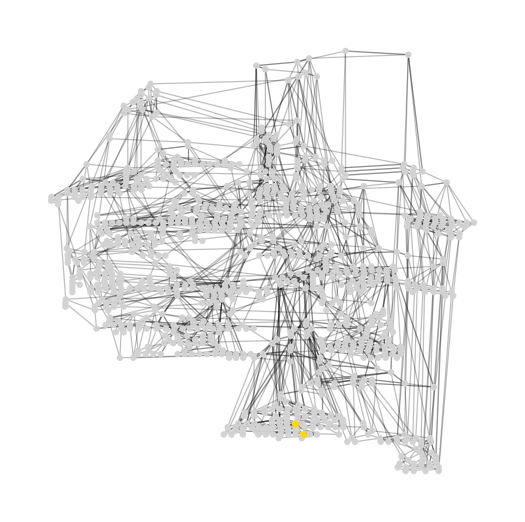

In [64]:
state_network.draw_hypergraph_filters()